In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="whitegrid", palette="muted")
current_palette = sns.color_palette()

xrange = range

In [18]:
dataset = pd.read_csv("../input/WA_Fn-UseC_-HR-Employee-Attrition.csv")
age = dataset.ix[:, 0]
attrition = dataset.ix[:, 1]

dataset.ix[:, 0] = attrition
dataset.ix[:, 1] = age

dataset = dataset.rename(columns = {'Age': 'Attrition', 'Attrition': 'Age'})
dataset.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Below summary for the whole dataset in 2D space after apply Standard Scaler scikit into the dataset

In [19]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = dataset.ix[:, 1:]
Y = dataset.ix[:, :1]

labels = np.unique(Y.values).tolist()

Y.ix[:, 0] = LabelEncoder().fit_transform(Y.ix[:, 0])

for i in xrange(X.shape[1]):
    if str(type(X.ix[0, i])).find('str') > 0:
        X.ix[:, i] = LabelEncoder().fit_transform(X.ix[:, i])

X, _, Y, _ = train_test_split(X, Y, test_size=0.5)

X.ix[:, :] = StandardScaler().fit_transform(X.ix[:, :])

data_visual = TSNE(n_components = 2).fit_transform(X.values)

X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
310,-0.682746,0.617038,-1.762468,-2.442115,-0.895116,0.090643,-1.704816,0.0,-1.019459,-1.619921,...,1.222592,0.0,-0.928021,-0.307991,-1.335544,0.297101,-0.803719,-0.594046,-0.363797,-1.142689
354,-0.790804,-2.347165,-0.415970,1.413856,1.972953,-0.889099,1.989287,0.0,-0.934955,1.185991,...,-0.659303,0.0,0.226117,-0.935758,-0.572821,1.705933,-0.803719,-0.594046,-0.056804,-0.587215
266,-0.682746,0.617038,1.652854,-0.514129,1.723556,0.090643,0.511646,0.0,-1.113906,-0.684617,...,-0.659303,0.0,0.226117,-0.182437,-0.572821,0.297101,0.329194,-1.138805,1.478162,1.079206
840,-0.250517,0.617038,0.442265,-0.514129,-1.019814,1.070385,0.511646,0.0,0.219945,1.185991,...,-0.659303,0.0,0.226117,-0.182437,-0.572821,0.297101,0.167350,-1.138805,-0.363797,0.801470
226,-0.034402,-0.865064,-1.226385,1.413856,-0.645718,1.070385,-0.227175,0.0,-1.206696,-1.619921,...,0.281644,0.0,0.226117,0.194224,-0.572821,0.297101,0.329194,1.040229,0.864175,1.079206


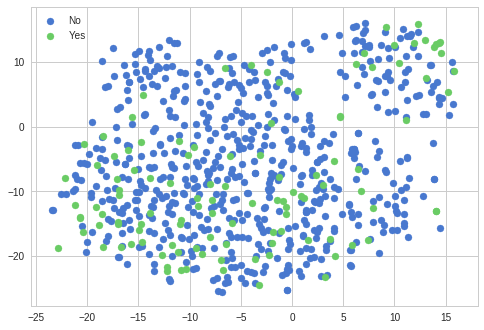

In [20]:
for i, _ in enumerate(np.unique(Y.values)):
    plt.scatter(data_visual[Y.values[:, 0] == i, 0], data_visual[Y.values[:, 0] == i, 1], color = current_palette[i], label = labels[i])
    
plt.legend()
plt.show()

In [21]:
dataset_copy = dataset[['Department', 'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole']]

dataset_copy.head()

,Department,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole
0,Sales,8,1,6,4
1,Research & Development,10,3,10,7
2,Research & Development,7,3,0,0
3,Research & Development,8,3,8,7
4,Research & Development,6,3,2,2


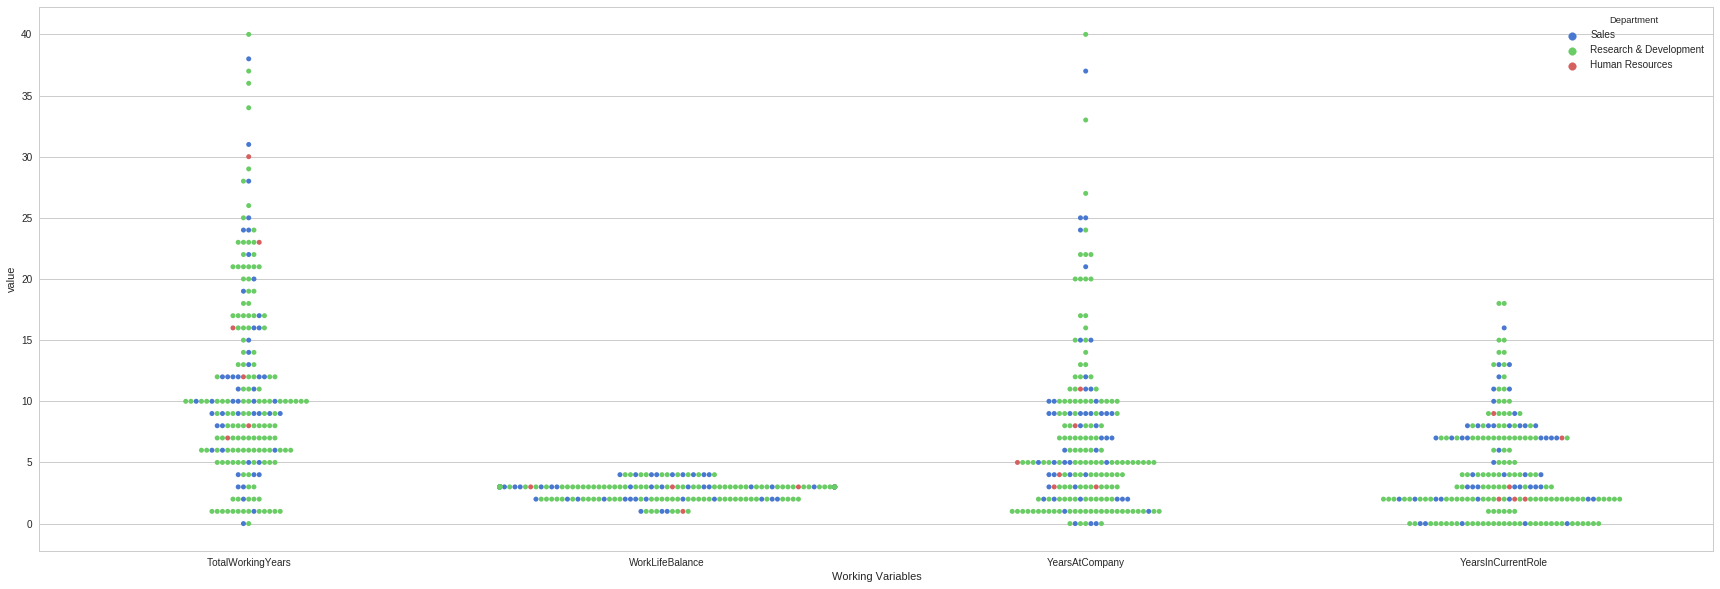

In [22]:
dataset_copy = dataset_copy.ix[:200, :]

plt.figure(figsize=(30,10))

department = pd.melt(dataset_copy, "Department", var_name="Working Variables")

swarm_plot = sns.swarmplot(x="Working Variables", y="value", hue="Department", data=department)
plt.show()

#### There are no Human Resources stay longer in the company like other departments.
#### There are no Human Resources stayed in his position in a long period

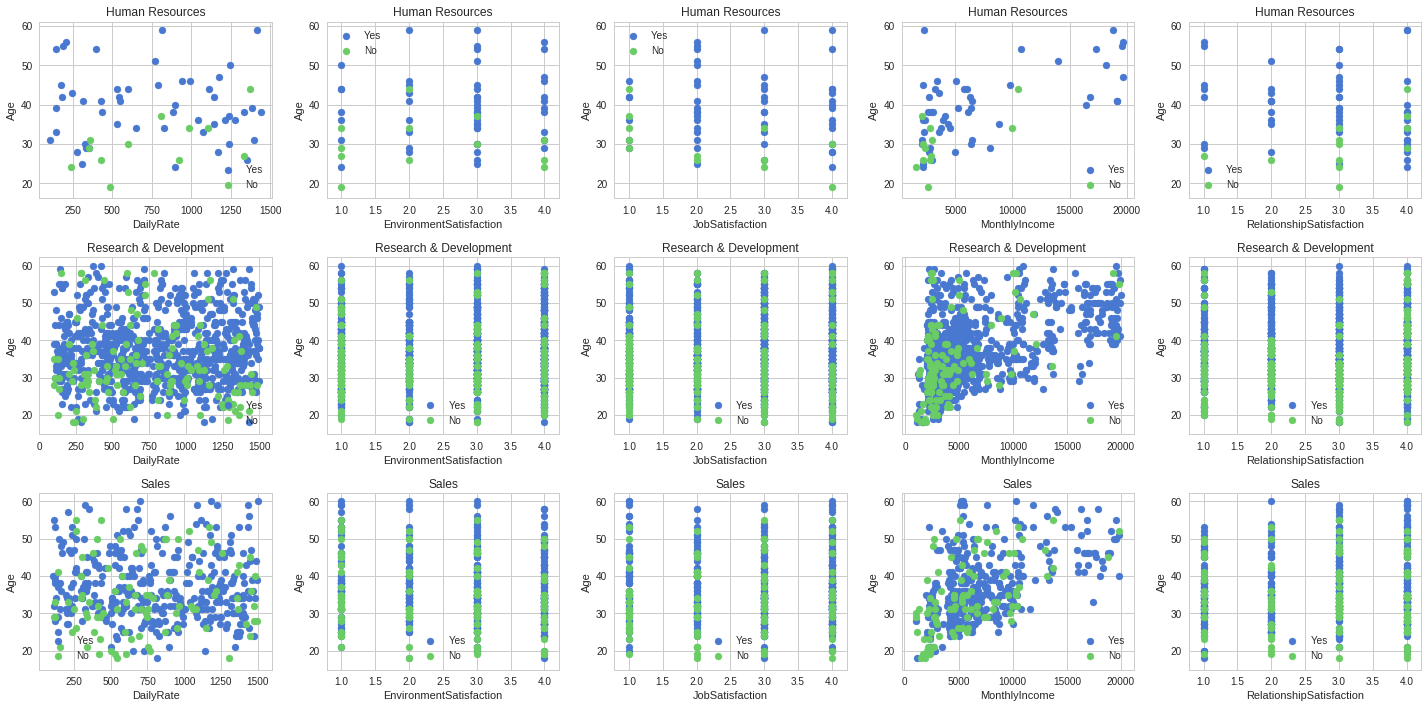

In [23]:
fig = plt.figure(figsize=(20,10))

head_subplot = np.unique(dataset.ix[:, 4].values)

head_int_label = LabelEncoder().fit_transform(dataset['Department'])

unique_head_int_label = np.unique(head_int_label)

rows = ['DailyRate', 'EnvironmentSatisfaction', 'JobSatisfaction', 'MonthlyIncome', 'RelationshipSatisfaction']

Y = dataset['Age'].ix[:].values

labelset = LabelEncoder().fit_transform(dataset['Attrition'])

labels = dataset['Attrition'].unique()

num = 1

for i in xrange(len(head_subplot)):
    for k in xrange(len(rows)):
        plt.subplot(len(head_subplot), len(rows), num)

        X = dataset[rows[k]].ix[:].values

        X = X[head_int_label == unique_head_int_label[i]]
        
        Y_in = Y[head_int_label == unique_head_int_label[i]]
        
        labelset_filter = labelset[head_int_label == unique_head_int_label[i]]
        
        for no, text in enumerate(labels):
            plt.scatter(X[labelset_filter == no], Y_in[labelset_filter == no], color = current_palette[no],
                        label = labels[no])
        plt.title(head_subplot[i])
        plt.ylabel('Age')
        plt.xlabel(rows[k])
        plt.legend()
        
        num += 1
        
fig.tight_layout()        
plt.show()     
    

## Yes/No classified by Attrition

#### We need to clean the data before predict the satisfaction

In [24]:
dataset = pd.read_csv("../input/WA_Fn-UseC_-HR-Employee-Attrition.csv")

del dataset['Over18']
del dataset['OverTime']

# 17th column and above
X = dataset.ix[:, 17:].values

# change marriage status into int
X[:, 0] = LabelEncoder().fit_transform(X[:, 0])

Y = dataset['JobSatisfaction'].ix[:].values

def one_hot_label(x):
    data = np.zeros((x.shape[0], np.unique(x).shape[0]), dtype = np.float32)
    
    for i in xrange(x.shape[0]):
        data[0, x[i] - 1] = 1.0
        
    return data

Y = one_hot_label(Y)

X = StandardScaler().fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:431: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


#### Predict Job Satisfaction using Deep Neural Network

In [25]:
import tensorflow as tf

epoch = 100
learning_rate = 0.01
delta_penalty = 0.005
prob_dropout = 0.5

first_layer = 64
second_layer = 128
third_layer = 64

x_placeholder = tf.placeholder('float', [None, X.shape[1]])
y_placeholder = tf.placeholder('float', [None, Y.shape[1]])

weights = {
    'first_weight' : tf.Variable(tf.random_normal([X.shape[1], first_layer])),
    'second_weight' : tf.Variable(tf.random_normal([first_layer, second_layer])),
    'third_weight' : tf.Variable(tf.random_normal([second_layer, third_layer])),
    'fourth_weight' : tf.Variable(tf.random_normal([third_layer, Y.shape[1]])),
}

biases = {
    'first_bias' : tf.Variable(tf.random_normal([first_layer])),
    'second_bias' : tf.Variable(tf.random_normal([second_layer])),
    'third_bias' : tf.Variable(tf.random_normal([third_layer])),
    'fourth_bias' : tf.Variable(tf.random_normal([Y.shape[1]])),
}

first_layer = tf.nn.relu(tf.add(tf.matmul(x_placeholder, weights['first_weight']), biases['first_bias']))
first_layer = tf.nn.dropout(first_layer, prob_dropout)

second_layer = tf.nn.relu(tf.add(tf.matmul(first_layer, weights['second_weight']), biases['second_bias']))
second_layer = tf.nn.dropout(second_layer, prob_dropout)

third_layer = tf.nn.relu(tf.add(tf.matmul(second_layer, weights['third_weight']), biases['third_bias']))
third_layer = tf.nn.dropout(third_layer, prob_dropout)

fourth_layer = tf.add(tf.matmul(third_layer, weights['fourth_weight']), biases['fourth_bias'])

regularizers =  sum(map(lambda x: tf.nn.l2_loss(x), [value for _, value in weights.items()]))

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = fourth_layer, labels = y_placeholder)) + (delta_penalty * regularizers)

optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

correct_prediction = tf.equal(tf.argmax(fourth_layer, 1), tf.argmax(y_placeholder, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [27]:
import time

sess = tf.InteractiveSession()
    
sess.run(tf.global_variables_initializer())

for i in xrange(epoch):
    
    last_time = time.time()
    
    acc,_, lost = sess.run([accuracy, optimizer, loss], feed_dict = {x_placeholder : x_train, y_placeholder : y_train})
    
    print ("epoch: ", i + 1, ", loss: ", lost, ", seconds per epoch: ", time.time() - last_time)
    print ("total accuracy: ", acc)
    

epoch:  1 , loss:  61.3689 , seconds per epoch:  0.2509186267852783
total accuracy:  0.236584
epoch:  2 , loss:  53.0834 , seconds per epoch:  0.022593259811401367
total accuracy:  0.23356
epoch:  3 , loss:  52.708 , seconds per epoch:  0.01508188247680664
total accuracy:  0.230537
epoch:  4 , loss:  54.7541 , seconds per epoch:  0.05690813064575195
total accuracy:  0.221466
epoch:  5 , loss:  49.1362 , seconds per epoch:  0.016088008880615234
total accuracy:  0.253212
epoch:  6 , loss:  51.1664 , seconds per epoch:  0.013266324996948242
total accuracy:  0.222978
epoch:  7 , loss:  57.9531 , seconds per epoch:  0.06342554092407227
total accuracy:  0.220711
epoch:  8 , loss:  49.9524 , seconds per epoch:  0.014540433883666992
total accuracy:  0.206349
epoch:  9 , loss:  53.3234 , seconds per epoch:  0.012204170227050781
total accuracy:  0.216175
epoch:  10 , loss:  47.8702 , seconds per epoch:  0.01162576675415039
total accuracy:  0.198791
epoch:  11 , loss:  50.413 , seconds per epoch:

# You can try to run more longer to get better accuracy